# Table of Content

- <a href='#Libs'> 1. Importing libraries and loading dataset </a>
- <a href='#Duplicates'> 2. Removing duplicates </a>
- <a href='#translation'> 3. Translating data into English </a>
- <a href='#dtypes'> 4. Converting dtypes </a>
- <a href='#validation'>5. Data validation </a>
- <a href='#imputation'> 6. Missing Values Imputation </a>
    - <a href='#univariate'> 6.1 Univariate Imputation </a>
    - <a href='#multivariate'> 6.2 Multivariate Imputation </a>

<a id='Libs'></a>
# 1. Importing libraries and loading dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import math
import sys
%matplotlib inline 

# Setting this option will print all collumns of a dataframe
pd.set_option('display.max_columns', None)

# Setting this option will print all rows of a dataframe
pd.set_option('display.max_rows', None)

np.set_printoptions(threshold=sys.maxsize)

# disable SettingWithCopyWarning
pd.options.mode.chained_assignment = None

pd.set_option('future.no_silent_downcasting', True)

In [3]:
cars = pd.read_csv("cars.csv")

In [4]:
cars.shape

(40297, 93)

In [5]:
cars.columns

Index(['VIN', 'Názov', 'Značka', 'Model', 'URL', 'Kraj', 'Lokalita',
       'Rok výroby', 'Stav', 'Najazdené', 'Palivo', 'Objem', 'Výkon',
       'Prevodovka', 'Karoséria', 'Pohon', 'Dvere', 'Miest', 'Farba', 'ABS',
       'Airbagy', 'Adaptívny tempomat', 'ADS', 'Alarm', 'ASR',
       'Brzdový asistent', 'Centrálne zamykanie', 'Deaktivácia airbagov',
       'DSC', 'EBD', 'EBV', 'ESP', 'Imobilizér', 'Isofix',
       'Mechanické zabezpečenie', 'MSR', 'Natáčacie svetlomety',
       'Parkovacia kamera', 'Systém kontroly tlaku v pneumatikách (TPMS)',
       'Apple CarPlay', 'Android Auto', 'Welcome light', 'Autorádio',
       'Adaptívny podvozok', 'Bezdotykové otváranie kufra',
       'Bezkľúčové otváranie dverí', 'Bezkľúčové štartovanie',
       'Bluetooth handsfree', 'CD menič', 'Diaľkové ovládanie zamykania',
       'Dotykový displej', 'Elektrické okná', 'Elektrické sedadlá',
       'Elektrické zrkadlá', 'Fólie', 'Klimatizácia',
       'Klimatizovaná priehradka', 'Kožený interiér', 'Lakť

<a id='Duplicates'></a>
# 2. Removing duplicates

In [7]:
# drop duplicates
cars.drop_duplicates(keep='first', inplace=True)

<a id='translation'></a>
# 3. Translating data into English

### Column Names

In [10]:
cars = cars[["Názov", "Značka", "Model", "Kraj", "Rok výroby", "Najazdené", "Palivo", "Objem", "Výkon", "Prevodovka", "Karoséria", "Pohon", "Miest", "Farba", "Cena"]]
cars = cars.rename(columns={"Názov": "Description", "Značka": "Brand", "Kraj": "Region", "Rok výroby":"Year", "Najazdené":"km", "Palivo":"Fuel", "Objem":"Engine Volume", "Výkon":"Power", "Prevodovka":"Transmission", 
                     "Karoséria":"Bodywork", "Pohon":"Drive", "Miest":"Seats", "Farba":"Colour", "Cena":"Price"})

In [11]:
cars.head()

,Description,Brand,Model,Region,Year,km,Fuel,Engine Volume,Power,Transmission,Bodywork,Drive,Seats,Colour,Price
0,Renault 11 GTL B,Renault,11,ZA kraj,8/1984,104 731,Benzín,1397 cm³ (1.4 l),43 kw (58 PS),5-st. manuálna,Liftback,Predný,5-miestne,Modrá metalíza,7 900 €
1,"Audi S5/S5 Sportback S5 Lift, B&O, Full LED M...",Audi,S5/S5,KE kraj,8/2020,67 952,Diesel,2967 cm³ (3 l),255 kw (347 PS),8-st. automatická,Liftback,4x4,5-miestne,Čierna metalíza,54 999 €
2,Dacia Sandero Essential ECO-G 100,Dacia,Sandero,BA kraj,2023,10,LPG + benzín,998 cm³ (1 l),100 kw (136 PS),5-st. manuálna,Liftback,Predný,5-miestne,Biela,13 250 €
3,Ford Focus 1.0 EcoBoost Titanium,Ford,Focus,KE kraj,2020,72 000,Benzín,998 cm³ (1 l),74 kw (101 PS),6-st. manuálna,Liftback,Predný,5-miestne,Čierna metalíza,11 990 €
4,Škoda Octavia 1.5 TSI ACT Sportline,Škoda,Octavia,BB kraj,2024,32,Benzín,1498 cm³ (1.5 l),110 kw (150 PS),6-st. manuálna,Liftback,Predný,5-miestne,Zelená sv.,31 914 €


### Region

In [13]:
regions = {"BA", "ZA", "TN", "KE", "NR", "BB", "TT", "PO", "CZ"}
cars["Region"]=cars["Region"].replace(to_replace={"BA kraj": "BA",
                                             "ZA kraj": "ZA",
                                             "TN kraj": "TN",
                                             "KE kraj": "KE",
                                             "NR kraj": "NR",
                                             "BB kraj": "BB",
                                             "TT kraj": "TT",
                                             "PO kraj": "PO"})
cars["Region"]=cars["Region"].replace(to_replace=r'^CZ.*', value='CZ', regex=True)
cars = cars[cars.Region.isin(regions)]

### Year

In [15]:
cars["Year"] = [str(year)[-4:] if year else np.nan for year in cars["Year"]]
cars['Year'] = cars['Year'].replace('nan', np.NaN)

### km

In [17]:
cars["km"]=cars["km"].replace(to_replace=r' ', value='',regex=True)

### Fuel

In [19]:
cars["Fuel"]=cars["Fuel"].replace(to_replace={"Benzín": "Petrol",
                                             "Elektromotor": "Electric",
                                             "LPG + benzín": "LPG + Petrol",
                                             "Elektrina - diesel": "Electric - diesel"})

### Engine Volume (l)

In [21]:
cars["Engine Volume"]=cars["Engine Volume"].replace(to_replace=r'.*[(]', value='', regex=True).replace(to_replace=r' l[)]', value='', regex=True)

### Power (kW)

In [23]:
cars["Power"]=cars["Power"].replace(to_replace=r' kw.*', value='', regex=True)

### Transmission

In [25]:
cars["Transmission"]=cars["Transmission"].replace(to_replace=r'.*[Aa]utomat.*', value='automatic',regex=True)
cars["Transmission"]=cars["Transmission"].replace(to_replace=r'.*[Mm]anuál.*', value='manual',regex=True)

### Bodywork

In [27]:
cars["Bodywork"].unique()

array(['Liftback', 'Cabrio', 'Iné', 'Limuzína', 'Pick up',
       'Sedan / Liftback', 'Sedan', 'Van', 'Coupé', 'MPV',
       'SUV / Off-road', 'Combi'], dtype=object)

In [28]:
cars["Bodywork"]=cars["Bodywork"].replace(to_replace={"Iné": "Other",
                                             "Limuzína": "Limousine"})

### Drive

In [30]:
cars["Drive"]=cars["Drive"].replace(to_replace={"Iné": "Other",
                                             "Predný": "Front",
                                             "Zadný" : "Rear" })

### Seats 

In [32]:
cars["Seats"].value_counts()

Seats
5-miestne     29369
7-miestne      2098
4-miestne      1750
3-miestne       553
2-miestne       452
6-miestne       256
8-miestne       222
9-miestne       195
10-miestne        1
Name: count, dtype: int64

In [33]:
cars["Seats"]=cars["Seats"].replace(to_replace=r'-miestne.*', value='',regex=True)

### Colour

In [35]:
cars["Colour"]=cars["Colour"].replace(to_replace={"^Biela.*" : "White",
                                                      ".*White.*" : "White",
                                                      "^Bieložltá.*": "White",
                                                      "^[Čč]ierna.*" : "Black",
                                                      ".*[Bb]lack.*" : "Black",
                                                      ".*BLACK.*": "Black",
                                                      "^[šŠ]edá.*" : "Grey",
                                                      ".*[gG]r[ea]y.*" : "Grey",
                                                      ".*[Ss]ivá.*" : "Grey",
                                                      ".*GREY.*": "Grey",
                                                      "Kaikoura Stone": "Grey",
                                                      "^[mM]odrá.*": "Blue",
                                                      ".*Blue.*": "Blue",
                                                      "^[Mm]odrošedá.*": "Blue-Gray",
                                                      "^[Mm]odrozelená.*": "Blue-Green",
                                                      "^[Zz]elenošedá.*" : "Greenish Gray",
                                                      "[Ss]ivozelená.*" : "Greenish Gray",
                                                      "^[Ss]trieborná.*": "Silver",
                                                      ".*[Ss]ilver.*" : "Silver",
                                                      "^[Čč]ervená.*" : "Red",
                                                      ".*Red.*" : "Red",
                                                      "^Vínová.*" : "Burgundy",
                                                      "^bordová.*" : "Burgundy",
                                                      "^Hnedá.*" : "Brown", 
                                                      "Lantau Bronze" : "Brown", 
                                                      "^Zelená.*" : "Green",
                                                      ".*Green.*" : "Green",
                                                      "^Oranžová.*" : "Orange",
                                                      "^Béžová.*" : "Beige", 
                                                      "^Zlatá.*" : "Gold", 
                                                      "^Žlt[áo].*" : "Yellow",
                                                      "Splash Lemon" : "Yellow",
                                                      "^Fialová.*" : "Purple",
                                                      "Barossa" : "Purple",
                                                      "^Ružová.*" : "Pink",
                                                      "^metalíza" : np.nan,
                                                      "259 metalíza" : np.nan,
                                                      "^Iné.*" : np.nan,
                                                      },regex=True)

### Price (€)

In [37]:
cars["Price"]=cars["Price"].replace(to_replace=r' €', value='',regex=True).replace(to_replace=r',.*', value='',regex=True).replace(to_replace=r' ', value='',regex=True)

In [38]:
# drop rows where price is null or contains value "Dohodou"
cars.dropna(subset=['Price'], axis='index', how='any', inplace=True)
cars = cars.drop(cars[cars['Price'] == 'Dohodou'].index)

In [39]:
cars.head()

,Description,Brand,Model,Region,Year,km,Fuel,Engine Volume,Power,Transmission,Bodywork,Drive,Seats,Colour,Price
0,Renault 11 GTL B,Renault,11,ZA,1984,104731,Petrol,1.4,43,manual,Liftback,Front,5,Blue,7900
1,"Audi S5/S5 Sportback S5 Lift, B&O, Full LED M...",Audi,S5/S5,KE,2020,67952,Diesel,3,255,automatic,Liftback,4x4,5,Black,54999
2,Dacia Sandero Essential ECO-G 100,Dacia,Sandero,BA,2023,10,LPG + Petrol,1,100,manual,Liftback,Front,5,White,13250
3,Ford Focus 1.0 EcoBoost Titanium,Ford,Focus,KE,2020,72000,Petrol,1,74,manual,Liftback,Front,5,Black,11990
4,Škoda Octavia 1.5 TSI ACT Sportline,Škoda,Octavia,BB,2024,32,Petrol,1.5,110,manual,Liftback,Front,5,Green,31914


<a id='dtypes'></a>
# 4. Converting dtypes 

In [41]:
cars['Year'] = cars['Year'].astype(pd.Int64Dtype())
cars['km'] = cars['km'].astype(pd.Int64Dtype())
cars['Engine Volume'] = cars['Engine Volume'].astype(pd.Float64Dtype())
cars['Power'] = cars['Power'].astype(pd.Float64Dtype())
cars['Seats'] = cars['Seats'].astype(pd.Int64Dtype())
cars['Price'] = cars['Price'].astype(pd.Float64Dtype())

<a id='validation'></a>
# 5. Data validation

## 5.1 Brands

In [44]:
#cars["Brand"].value_counts()

In [45]:
cars["Brand"]=cars["Brand"].replace(to_replace={"Skoda": "Škoda", "ŠKODA": "Škoda", "SKODA": "Škoda",
                                                 "Bmw": "BMW", "bmw": "BMW", 
                                                 "VW": "Volkswagen", "VOLKSWAGEN": "Volkswagen", "VOLKSVAGEN": "Volkswagen", 
                                                  "AUDI": "Audi",
                                                  "Mercedes": "Mercedes-Benz", "MERCEDES-BENZ": "Mercedes-Benz", "Mercedes&#45;Benz": "Mercedes-Benz",
                                                  "FORD": "Ford", "ford": "Ford",
                                                  "VOLVO": "Volvo",
                                                  "PEUGEOT": "Peugeot",
                                                  "TOYOTA": "Toyota", "toyota": "Toyota",
                                                  "HYUNDAI": "Hyundai",
                                                  "OPEL": "Opel",
                                                  "KIA": "Kia",
                                                  "RENAULT": "Renault", 
                                                  "SEAT": "Seat", "seat": "Seat",
                                                  "Citroen": "Citroën",
                                                  "MAZDA": "Mazda", "mazda": "Mazda",
                                                  "JEEP": "Jeep",
                                                  "NISSAN": "Nissan", 
                                                  "FIAT": "Fiat",
                                                  "HONDA": "Honda",
                                                  "LEXUS": "Lexus", 
                                                  "TESLA": "Tesla",
                                                  "MG": "Mg",
                                                  "CUPRA": "Cupra",
                                                  "Alfa": "Alfa Romeo",
                                                  "MINI": "Mini",
                                                  "Land": "Land Rover",
                                                  "Aston": "Aston Martin",
                                                  "Rolls": "Rolls Royce",
                                                 })

In [46]:
# Models for each brand
brands_models = {"Abarth": ["500","500","595","595C","124 spider","695"],
                 "Alfa Romeo": ["4C", "8C", "33", "75", "90", "145", "146", "147", "155", "156", "159", "164", "166", "Alfetta", "Brera", "Spider", "Crosswagon", "Giulia", "Giulietta", 
                                "MiTo", "Tonale", "Stelvio", "Testa Fissa", "GT"], 
                 "Aston Martin" : ["DB7", "DB9", "DBX", "Rapide", "V8 Vantage", "Vanquish", "Virage Volante"],
                 "Audi": ["80", "90", "100","200","5000", "A1", "A2","A3","A4","A5","A6","A7","A8","E-tron","Q2","Q3","Q4","Q5","Q7","Q8","R8","RS","RS2","RS3","RS4","RS5","RS6","RS7","RSQ3",
                          "RSQ8","S1","S2","S3","S4","S5","S6","S7","S8","SQ5","SQ7","SQ8","UR Quattro","V8", "TT"],
                 "Austin": ["Allegro","FX4","Metro","Mini","Montego"],
                 "BMW": ['i3', 'i4', 'i5', 'i7', 'i8', 'i8 Roadster', 'i3s', 'iX', 'iX1', 'iX2', 'iX3', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M8', 'Rad 1', 'Rad 2', 'Rad 3', 
                         'Rad 4', 'Rad 5', 'Rad 6', 'Rad 7', 'Rad 8', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'XM', 'X3 M','X4 M','X5 M','X6 M', 'Z3', 'Z4','Z8'],
                 "Bentley":["Arnage","Azure","Bentayga","Brooklands","Continental","Continental Flying Spur","Continental GT Speed","Continental GTC","Continental R","Mulsanne","Turbo RT"],
                 "Cadillac":["ATS","BLS","Brougham","CT6","CTS","Deville","Eldorado","Escalade","Fleetwood","Seville","SRX","STS","XLR","XT5"],
                 "Chrysler":["180","200","300 C","300 M","Aspen","Concorde","Conquest","Crossfire","Daytona","Eagle","Grand Voyager","GTS","Intrepid","Le Baron","LHS","Neon","New Yorker","Pacifica","Plymouth","PT Cruiser","Saratoga","Sebring","Simca","Stratus","Town & Country","Viper","Vision","Voyager"],
                 "Citroën":['AX', 'Berlingo', 'BX', 'C1', 'C2', 'C3', 'C4', 'C4 X', 'C5', 'C5 X', 'C6', 'C8', 'C15', 'C25', 'C-Crosser', 'C-Elysée', 'C-Zero', 'CX', 'DS3', 'DS4', 'DS5', 'Evasion',
                            'Jumper', 'Jumpy', 'Nemo', 'Saxo', 'Spacetourer', 'Visa', 'Xantia', 'XM', 'Xsara', 'ZX'] ,
                 "Cupra":['Ateca', 'Born', 'Formentor', 'Cupra Leon'],
                 "DS":['6', '3', '3 CROSSBACK', '4 CROSSBACK', '4', '5', '7', '7 CROSSBACK', '9'],
                 "Dacia": ['1300', '1302', '1304', '1305', '1307', '1309', '1310', '1410', 'Dokker', 'Dokker Van', 'Double Cab', 'Duster', 'Jogger', 'Lodgy', 'Logan', 'Logan MCV', 'Logan Pick-up', 'Logan Van', 'Nova', 'Pick-up', 'Sandero', 'Solenza', 'Spring', 'SuperNova'],
                 "Daewoo": ['Espero', 'Evanda', 'FSO Truck', 'Chairman', 'Kalos', 'Korando', 'Lacetti', 'Lanos', 'Leganza', 'Lublin', 'Matiz', 'Musso', 'Nexia', 'Nubira', 'Prince', 'Racer', 'Tacuma', 'Tico'],
                 "Daihatsu": ['Applause', 'Copen', 'Cuore', 'Feroza', 'Gran Move', 'Hijet', 'Charade', 'Materia', 'Move', 'Rocky', 'Sirion', 'Taft', 'Terios', 'Trevis', 'YRV'],
                 "Dodge": ['Avenger', 'Caliber', 'Caravan', 'Dakota', 'Daytona', 'Durango', 'Dynasty', 'Grand Caravan', 'Challenger', 'Charger', 'Intrepid', 'Journey', 'Magnum', 'Neon', 'Nitro', 'RAM', 'Shadow', 'Spirit', 'SRT-4', 'Stealth', 'Stratus', 'Viper'],
                 "Dongfeng": ['Fengon 5', 'DF 6', 'Fengon 7', 'Glory 580', 'Forthing T5 EVO', 'Glory 500', 'Seres 3', 'Shine', 'Shine E1', 'Shine E3', 'Seres SF5', 'T5 EVO EV', 'U-TOUR', 'Forthing U-Tour'],
                 "Ferrari": ['106', '296', '308', '328', '348', '360', '400', '430', '456', '458', '488', '550', '575', '599', '612 Scaglietti', '812 Superfast',
                             'California', 'Enzo', 'F12 berlinetta', 'F 40', 'F550', 'F 355', 'F 430', 'F8 Spider', 'F 430 Spider', 'FF', 'FXX', 'GTC4 Lusso',
                             'GTS', 'Challenge', 'LaFerrari', 'Maranello', 'Mondial', 'Superamerica', 'SF90', 'Testarossa', 'Portofino', 'Roma', 'F8 Tributo'],
                 "Fiat": ['500e', '124 Spider', '125', '126', '127', '128', '131', '500', '500L', '500X', '600', '650E', '850', '1100', 'Albea', 'Barchetta', 'Brava', 'Bravo', 'Campagnola', 'Cinquecento',
                          'Coupé', 'Croma', 'Dobló', 'Ducato', 'Dolcevita', 'Duna', 'Elba Innocenti', 'Fiorino', 'Freemont', 'Fullback', 'Grande Punto', 'Idea', 'Linea', 'Marea', 'Marengo', 'Mirafiori',
                          'Multipla', 'Palio', 'Panda', 'Punto', 'Qubo', 'Regata', 'Ritmo', 'Scudo', 'Sedici', 'Seicento', 'Stilo', 'Strada', 'Talento', 'Tempra', 'Tipo', 'Ulysse', 'Uno', 'X1/9'],
                 "Ford": ['Aerostar', 'B-Max', 'Bronco', 'C-Max', 'Capri', 'Cortina', 'Cougar', 'Courier', 'Econoline', 'EcoSport', 'Edge', 'Escape', 'Escort', 'Everest', 'Excursion', 'Expedition', 'Explorer', 'F-100', 'F-150', 'F-250', 'F350',
                          'Festiva', 'Fiesta', 'Five Hundred', 'Flex', 'Focus', 'Freestyle', 'FT 350', 'Fusion', 'Galaxy', 'Giotti Van', 'Granada', 'Grand C-Max', 'GT', 'Ka', 'Kuga', 'Maverick', 'Mercury', 'Mondeo', 'Mustang', 'Orion', 'Probe', 'Puma',
                          'Ranger', 'S-Max', 'Scorpio', 'Shelby Cobra', 'Sierra', 'Sport Ka', 'Street Ka', 'Taunus', 'Taurus', 'Tempo', 'Thunderbird', 'Tourneo', 'Transit', 'Windstar'],
                 "Honda": ['ZR-V', 'Accord', 'City', 'Civic', 'Concerto', 'CR-V', 'CR-X', 'CR-Z', 'E', 'Element', 'FR-V', 'HR-V', 'Insight', 'Integra', 'Jazz', 'Legend', 'Logo', 'NSX', 'Odyssey', 'Passport', 'Pilot', 'Prelude', 'Ridgeline', 'S2000', 'Shuttle', 'Stream'],
                 "Hummer": ["H1","H2","H3"],
                 "Hyundai": ['Accent', 'Atos', 'Bayon', 'Coupé', 'Elantra', 'Equus', 'Excel', 'Galloper', 'Genesis', 'Getz', 'Grand Santa Fe', 'Grandeur', 'H1', 'H100', 'H200', 'H 250', 'H 350', 'i10', 'i20', 'i30','i30 Fastback', 'i40', 'Ioniq', 
                             'ix20', 'ix35', 'ix55', 'Kona', 'Lantra', 'Matrix', 'Palisade', 'Pony', 'S Coupe', 'Santa Fe', 'Santamo', 'Satellite', 'Sonata', 'Sonica', 'Starex', 'Terracan', 'Trajet', 'Tucson', 'Veloster', 'XG', 'Staria'],
                 "Chevrolet" : ["Aveo", "Camaro", "Caprice", "Captiva", "Corvette", "Cruze", "Kalos", "Lacetti", "Malibu", "Nubira", "Orlando", "Silverado", "Spark", "Suburban", "Tahoe", "Trax"],
                 "Infiniti": ["FX", "QX70", "Q30", "Q50", "Q70", "QX", "QX50", "QX56", "QX80"]  ,
                 "Isuzu": ["D-Max", "M21"],
                 "Iveco": ["Daily", "Massif"],
                 "Jaguar": ['Daimler', 'E-Pace', 'F-Pace', 'F-Type', 'I-Pace', 'S-Type', 'Sovereign', 'X-Type', 'X-Type Estate', 'XE', 'XF', 'XJ', 'XJR', 'XJS', 'XK'],
                 "Jeep": ['CJ', 'Commander', 'Compass', 'Feroza', 'Gladiator', 'Grand Cherokee', 'Avenger', 'Cherokee', 'Liberty', 'Patriot', 'Renegade', 'Sahara', 'Wagoneer', 'Willys', 'Wrangler'],
                 "Kia": ["Avella","Besta","Carens","Carnival","Ceed","Cee'd","Cee'd SW","Cerato","Clarus","E-Soul","EV6","EV9","Joice","K7","K9","K 2500","K 2700","K 2900","Magentis","Niro","Opirus","Optima","Optima SW",
                         "Picanto","Pregio","Pride","Pro Cee'd","Retona","Rio","Rio Combi","Sedona","Sephia","Shuma","Sorento","Soul","Sportage","Stinger","Stonic","Telluride","Venga","XCeed"],
                 "Lada": ["Vesta", "Niva", "2105"],
                 "Lamborghini": ["Urus", "Huracán", "Espada", "Gallardo"],
                 "Lancia": ["Voyager", "Delta", "Beta", "Thema"],
                 "Land Rover": ['109', 'Defender', 'Discovery', 'Freelander', 'Freelander 2', 'G4 Challenge', 'Range Rover', 'Range Rover Evoque', 'Range Rover Sport', 'Range Rover Velar', 'Range Rover Vogue'],
                 "Lexus": ['CT', 'ES', 'GS', 'GX', 'HS', 'IS', 'IS-F', 'LC', 'LS', 'LX', 'NX', 'RC', 'RX', 'RZ', 'SC', 'UX'],
                 "Lincoln": ["Aviator", "Continental", "Mark", "Navigator"],
                 "MAN": ["TGE"],
                 "Maserati": ['3200 GT', 'Biturbo', 'Cambiocorsa', 'Coupe', 'Ghibli', 'GranCabrio', 'GranSport', 'GranSport Spyder', 'GranTurismo', 'Quattroporte', 'Shamal', 'Spyder', 'Levante', 'Grecale', 'MC20'],
                 "Maybach": ["GLS"],
                 "Mazda": ['2', '3', '5', '6', '121', '323', '626', '929', 'B', 'B2500', 'B-Fighter', 'BT', 'CX-3', 'CX-5', 'CX-60', 'CX-7', 'CX-9', 'CX-30', 'Demio', 'E 2000', 'E 2200', 'MPV', 'MX-3', 'MX-5', 'MX-6', 'Premacy',
                           'RX 7', 'RX 8', 'Tribute', 'Xedos 6', 'Xedos 9', 'MX-30'],
                 "McLaren": ['570GT', '570S', '650S', '675LT', 'MP4-12C', '720S', '750S', '765LT', 'Artura'],
                 "Mercedes-Benz": ['100D', '107', '114', '115', '116', '123', '124', '126', '190', '200', '200 - 300', '206D', '207D', '208D', '208/308', '210', '230 - 300 CE Kupé', '240 D', '250 D', '300', '309D', '310 ', '410D', '412D', '420 - 560 SEC Kupé', 
                                   '500 - 600 SEC Kupé', '508D', '512D', '601', ' 500 E', '608D', '609D', '611D', '612D', '814D', 'AMG GT', 'A trieda', 'B trieda', 'C trieda', 'Citan', 'CL', 'CLA', 'CLC', 'CLK', 'CLS', 'E trieda', 'EQA', 'EQB', 'EQC',
                                   'EQS', 'EQE', 'EQS SUV', 'EQT', 'EQV', 'G trieda', 'GL', 'GLA', 'GLB', 'GLC','GLE', 'GLK', 'GLS', 'M trieda', 'MB 100', 'ML', 'R trieda', 'S trieda', 'SL', 'SLC', 'SLK', 'SLR', 'SLS', 'Sprinter', 'V trieda', 'Vaneo', 'Viano',
                                   'Vito', 'W 110', 'W 211', 'Unimog', 'X trieda', 'T trieda'],
                 "Microcar": ['Bellier', 'JDM', 'Virgo Range', 'M GO', 'DUE'],
                 "Mg": ['Cyberster', 'EHS', 'F', 'HS', 'Marvel-R', 'MG5', 'MGF', 'MG4', 'Shelby Cobra', 'TF', 'TD', 'ZR', 'ZS', 'ZT'],
                 "Mini": ['Cabrio', 'Clubman', 'Cooper', 'Cooper S', 'Cooper SD', 'Countryman', 'John Cooper Works', 'One', 'Paceman'],
                 "Mitsubishi": ['3000 GT', 'ASX', 'Carisma', 'Colt', 'Cordia', 'Eclipse', 'Endeavor', 'FTO', 'Fuso canter', 'Galant', 'Grandis', 'L 200', 'L 300', 'L 400', 'Lancer', 'Mirage', 'Montero', 'Outlander', 'Pajero', 'Precis', 'Santamo',
                                'Sapporo', 'Shogun Pinin', 'Sigma', 'Space Gear', 'Space Runner', 'Space Star', 'Space Wagon', 'Starion', 'Tredia', 'i-MiEV'],
                 "Nissan": ['100 NX', '200 SX', '240 SX', '280 ZX', '300 ZX', '350 Z', '370 Z', 'Almera', 'Altima', 'Ariya', 'Bluebird', 'Cabstar', 'Cube', 'Datsun', 'Double cab', 'ECO', 'Evalia', 'e-NV200', 'Frontier', 'GT-R', 'Cherry', 'Infiniti', 
                            'Interstar', 'Juke', 'King Cab', 'Kubistar', 'L60', 'Laurel', 'Leaf', 'Maxima', 'Micra', 'Murano', 'Navara', 'Note', 'NP300 Pickup', 'NV200', 'NV400', 'Pathfinder', 'Patrol', 'Pickup', 'Pixo', 'Prairie', 'Primastar', 'Primera', 
                            'Pulsar', 'Qashqai', 'Quest', 'Rogue', 'Sentra', 'Serena', 'Silvia', 'Skyline', 'Stanza', 'Sunny', 'Terrano', 'Tiida', 'Titan', 'Townstar', 'Trade', 'Urvan', 'Vanette', 'X-Terra', 'X-Trail'],
                 "Opel": ['Adam', 'Agila', 'Ampera', 'Antara', 'Arena', 'Ascona', 'Astra', 'Calibra', 'Campo', 'Cascada', 'Combo', 'Commodore', 'Corsa', 'Crossland', 'Frontera', 'Grandland', 'GT', 'Insignia', 'Kadett', 'Karl', 'Manta CC', 'Meriva', 'Mokka', 
                          'Monterey', 'Monza', 'Movano', 'Omega', 'Rekord', 'Senator', 'Signum', 'Sintra', 'Speedster', 'Tigra', 'Rocks-e', 'Vectra', 'Vivaro', 'Zafira'],
                 "Peugeot": ['106', '107', '108', '205', '206', '207', '208', '301', '305', '306', '307', '308', '309', '405', '406', '407', '408', '505', '508', '605', '607', '806', '807', '1007', '2008', '3008', '4007', '4008', '5008', 
                             'Bipper', 'Boxer', 'Expert', 'iOn', 'J5', 'LH 320 Boxer', 'Partner', 'Ranch', 'RCZ', 'Rifter', 'Traveller'],
                 "Polestar": ["1","2","3"],
                 "Porsche": ['356', '718', '911', '911 Carrera Cabrio', '911 Targa', '911 Turbo / GT3', '924', '928', '944', '968', '996', '997', 'Boxster', 'Carrera', 'Cayenne', 'Cayman', 'Macan', 'Panamera', 'Taycan'],
                 "Renault": ['5', 'Avantime', 'Austral', 'Arkana', 'Alpine', 'Alaskan', 'Captur', 'Clio', 'Espace', 'Express', 'Fluence', 'Fuego', 'Grand Espace', 'Grand Modus', 'Grand Scénic', 'Kadjar', 'Kangoo', 'Koleos', 'Laguna', 'Latitude', 'Mascott',
                             'Master','Maxity', 'Mégane', 'Messenger', 'Modus', 'R4', 'R5', 'R8', 'Rafale', 'R9', 'R11', 'R18', 'R19', 'R20', 'R21', 'R25', 'Rapid', 'Safrane', 'Scénic', 'Spider', 'Talisman', 'Thalia', 'Trafic',  'Twingo', 'Twizy',
                             'Vel Satis', 'Wind', 'Zoe'],
                 "Rolls Royce": ['Corniche', 'Ghost', 'Dawn', 'Park Ward', 'Phantom', 'Silver Dawn', 'Silver Seraph', 'Silver Shadow', 'Silver Spirit', 'Silver Spur', 'Touring'],
                 "Saab": ["9-3","9-5","9-7X","95","96","99","9000","9000"],
                 "Seat": ['Alhambra', 'Altea', 'Arona', 'Arosa', 'Ateca', 'Cordoba', 'Exeo', 'Ibiza','Inca', 'Leon', 'Malaga', 'Marbella', 'Mii', 'Ronda', 'Tarraco', 'Terra', 'Toledo'],
                 "Smart": ["Fortwo", "Forfour", "Roadster"],
                 "Subaru": ['1800', 'Ascent', 'Baja', 'BRZ', 'Crosstrek', 'Domingo', 'Forester', 'G3X Justy', 'Impreza', 'Justy', 'Legacy', 'Leone', 'Levorg', 'Libero', 'Outback', 'Solterra', 'SVX', 'Trezia', 'Tribeca', 'Vanille', 'Vivio', 'WRX STI', 'XV'],
                 "Suzuki": ['Across', 'Aerio', 'Alto', 'Baleno', 'Carry', 'Celerio', 'Forenza', 'Grand Vitara', 'Ignis', 'Jimny', 'Kizashi', 'Liana', 'LJ', 'Maruti', 'Samurai', 'Santana', 'SJ', 'Splash', 'Super Carry', 
                            'Swace', 'Swift', 'SX4', 'Vitara', 'Wagon R+', 'X90'],
                 "SsangYong": ["Actyon", "Korando", "Kyron", "Musso", "Rexton", "Tivoli", "Torres", "XLV"],
                 "Tesla": ['Model 3', 'Model S', 'Model X', 'Model Y', 'Roadster'],
                 "Toyota": ['4-Runner', 'Alphard', 'Auris', 'Avalon', 'Avensis', 'Aygo', 'bZ4X', 'C-HR', 'Camry', 'Carina', 'Celica', 'Corolla', 'Cressida', 'Dyna', 'F', 'FJ Cruiser', 'Fortuner', 'GR86', 'GT86', 'Hiace', 'Highlander', 'Hilux', 'HZJ', 
                            'iQ', 'Land Cruiser', 'Liteace', 'Matrix', 'Mirai', 'MR2', 'Paseo', 'Picnic', 'Previa', 'Prius','Verso', 'Proace','Proace City','Proace City Verso', 'RAV4', 'Reiz', 'Scion XB', 'Sequoia', 'Sienna', 'Starlet', 'Supra', 'Tacoma', 'Tercel', 'Tundra', 'Urban Cruiser', 
                            'Venza', 'Yaris'],
                 "Volkswagen": ['ID.BUZZ', 'Amarok', 'Arteon', 'Atlas', 'Beetle', 'Bora', 'Caddy', 'California', 'Caravelle', 'CC', 'Corrado', 'Crafter', 'CrossTouran', 'e-Crafter', 'Eos', 'Fox', 'Golf', 'Grand California', 'Iltis', 'Jetta', 'LT', 'Lupo',
                                'Multivan', 'New Beetle', 'Passat', 'Phaeton', 'Polo', 'Routan', 'Scirocco', 'Sharan', 'T2', 'T3', 'T4', 'T5', 'T6', 'T-Roc', 'T-Cross', 'Taro', 'T7', 'Taigo', 'Tiguan', 'Touareg', 'Touran', 'Transporter', 'Up!', 'Vento',
                                'ID.3', 'ID.4', 'ID.5', 'ID.7'],
                 "Volvo": ['EX90', 'EX30', '240', '244', '340', '343', '345', '360', '440', '460', '480', '740', '760', '850', '900', '940', '960', 'C30', 'C40', 'C70', 'S40', 'S60', 'S70', 'S80', 'S90', 'V40', 'V50', 'V60', 'V70', 'V90', 'XC40', 'XC60', 'XC70', 'XC90'],
                 "Škoda": ['Enyaq', '100', '105', '110', '120', '125', '130', '135', '136', '1000', '1100', '1202', '1203', 'Citigo', 'Enyaq iV', 'Fabia', 'Favorit', 'Felicia', 'Forman', 'Kamiq', 'Karoq', 'Kodiaq', 'Octavia', 'Praktik', 'Rapid',
                           'Roomster', 'Scala', 'Superb', 'Yeti'],
                }

In [47]:
# filter brand values by dictionary brands_models
cars = cars[cars.Brand.isin(brands_models.keys())]

## 5.2 Models

In [49]:
import re
def model_checking(dataframe, description_column, brand_column, model_column, new_model_column):
    
    '''
    Create a new column that contains valid model values for each car brand.
            Parameters:
                    dataframe (string): name of dataframe
                    description_column (string): name of column that contains car description
                    brand_column (string): name of column that contains brand name of car
                    model_column (string): name of column that contains model name of car
                    new_model_column (string): the name of column that will contain the valid model values                     
    '''
    
    for index, model in dataframe[model_column].items():
        
        description = dataframe.loc[index, description_column]
        
        # replace some specific characters or words in description of car
        description = description.lower().replace("&#","-").replace("&#45;","-").replace("&#39;","-").replace("mercedes", "mercedes-benz").replace("cee’d","cee'd").replace("cee´d","cee'd").replace("pro_cee’d","pro cee'd").replace("pro_cee'd","pro cee'd")
        description = description.replace("citroen", "citroën").replace("třídy", "class").replace("třída", "class").replace("řada", "series").replace("doblo", "dobló").replace("megane", "mégane").replace("rav 4", "rav4").replace("4x4", " ")
        description = description.replace("trieda", "Class").replace("Trieda", "Class").replace("rad", "series")
        
        brand = dataframe.loc[index, brand_column]
        
        model_found = False
        
        # check provided model value (from model_columns) for a specific brand
        # if not found, then check if any of allowed model values for a specific brand can be found in the car description
        if model in brands_models[brand]:
            model_found = True
            dataframe.loc[index, new_model_column] = model
        else: 
            #print(f"{model} not found")
            for m in brands_models[brand]:
                if m.lower() in description:
                    model_found = True
                    dataframe.loc[index, new_model_column] = m
                   
        # specific cases
        # BMW:
        # BMW 435d xDrive Cabrio --> BMW 4 series
        if (model_found == False) and (brand.lower() == "BMW".lower()):
            found = re.search("[0-9][0-9][0-9][idLEe]", description)
            if found:
                series = found.group(0)[0]
                m = f"{series} series" 
                dataframe.loc[index, new_model_column] = m
                
        # Mercedes-Benz
        # MERCEDES-BENZ C 220d kabriolet --> MERCEDES-BENZ C class
        # MERCEDES-BENZ Trieda C --> MERCEDES-BENZ C class
        if (model_found == False) and (brand.lower() == "mercedes-benz".lower()):
            
            classes = ['A', 'B', 'C', 'E', 'G','M', 'R', 'S','V', 'X', 'T']
            for c in classes:
                if c.lower() in description.split():
                    dataframe.loc[index, new_model_column] = f"{c} class"
                    break

In [50]:
model_checking(cars, "Description", "Brand", "Model", "Model_new")
cars.dropna(subset=['Model_new'], axis='index', how='any', inplace=True)
cars.drop(columns=['Model'], inplace=True, errors='raise')
cars = cars.rename(columns={"Model_new": "Model"})

In [51]:
# reorder columns
# drop "Description" column
cars = cars[["Brand", "Model", "Region", "Year", "km", "Fuel", "Engine Volume", "Power", "Transmission", "Bodywork", "Drive", "Seats", "Colour", "Price"]]

## 5.3 Price

In [53]:
cars['Price'].describe()

count         36191.0
mean     34694.217374
std      39988.327148
min             100.0
25%           14000.0
50%           25390.0
75%           43685.0
max         3266887.0
Name: Price, dtype: Float64

## 5.4 Year

In [60]:
cars['Year'].describe()

count      36074.0
mean     2017.9865
std       5.844653
min         1920.0
25%         2016.0
50%         2019.0
75%         2022.0
max         2024.0
Name: Year, dtype: Float64

## 5.5 km

In [62]:
cars['km'].describe()

count          34779.0
mean     107131.149516
std       92160.136103
min               -5.0
25%            23000.0
50%            93810.0
75%           170202.0
max          1000000.0
Name: km, dtype: Float64

In [63]:
# replace negative values with pd.NA
for i in cars[cars["km"]<0].index:
    cars.loc[i,"km"] = pd.NA

## 5.6 Engine Volume

In [65]:
cars['Engine Volume'].describe()

count      35048.0
mean      2.758363
std      11.316441
min            0.0
25%            1.6
50%            2.0
75%            2.5
max          535.0
Name: Engine Volume, dtype: Float64

In [66]:
# replace all engine volume values higher than 8 with pd.NA
for i in cars[cars['Engine Volume']>8].index:
    cars.loc[i,"Engine Volume"] = pd.NA

In [67]:
# if engine volume == 0 for non electric car, set it to pd.NA
cars["Engine Volume"] = [pd.NA if (not pd.isnull(volume) and volume == 0 and fuel!="Electric") else volume for volume, fuel in zip(cars['Engine Volume'], cars['Fuel'])]

## 5.7 Power

In [69]:
cars['Power'].describe()

count        35939.0
mean      217.020006
std      5014.488433
min              1.0
25%            102.0
50%            130.0
75%            180.0
max         726070.0
Name: Power, dtype: Float64

In [70]:
# replace values where power is higher than 960 kW with pd.NA
for i in cars[cars['Power']>960].index:
    cars.loc[i,"Power"] = pd.NA

## 5.8 Transmission

In [72]:
cars['Transmission'].value_counts(dropna=False)

Transmission
automatic    24963
manual        9857
NaN           1338
3073            25
3074             8
Name: count, dtype: int64

In [73]:
cars["Transmission"]=cars["Transmission"].replace(to_replace=r'3.*', value=np.nan,regex=True)

## 5.9 Bodywork

In [75]:
cars['Bodywork'].value_counts(dropna=False)

Bodywork
Combi               14287
SUV / Off-road       9718
Sedan                4158
MPV                  1782
Coupé                1460
Van                  1452
Other                 829
Sedan / Liftback      828
Pick up               696
Cabrio                463
Limousine             305
Liftback              213
Name: count, dtype: int64

In [76]:
cars["Bodywork"]=cars["Bodywork"].replace("Other", pd.NA)

## 5.10 Drive

In [78]:
cars['Drive'].value_counts(dropna=False)

Drive
4x4      16822
Front    15208
Rear      2389
NaN       1715
Other       57
Name: count, dtype: int64

In [79]:
cars["Drive"]=cars["Drive"].replace("Other", np.nan)

## 5.11 Seats

In [81]:
cars['Seats'].value_counts(dropna=False)

Seats
5       26475
<NA>     4486
7        1986
4        1653
3         516
2         427
6         252
8         209
9         186
10          1
Name: count, dtype: Int64

## 5.12 Colour

In [83]:
cars['Colour'].value_counts(dropna=False)

Colour
White            7468
Black            7075
Grey             7053
Blue             3542
NaN              3450
Silver           2650
Red              1996
Brown            1135
Green             630
Orange            281
Beige             206
Gold              181
Yellow            142
Blue-Gray         130
Greenish Gray      87
Blue-Green         68
Purple             63
Burgundy           30
Pink                4
Name: count, dtype: int64

## 5.13 Fuel 

In [85]:
cars['Fuel'].value_counts(dropna=False)

Fuel
Diesel               21543
Petrol               10884
Hybrid                1897
Electric              1199
LPG + Petrol           301
Electric - diesel      220
Plug-in hybrid          66
CNG                     44
NaN                     36
Bioetanol                1
Name: count, dtype: int64

<a id='imputation'></a>
# 6. Missing Values Imputation

In [153]:
cars.isnull().sum().sort_values(ascending=True)

Brand               0
Model               0
Region              0
Fuel                0
Engine Volume       0
Power               0
Transmission        0
Bodywork            0
Drive               0
Seats               0
Colour              0
Price               0
Year              117
km               1415
dtype: int64

### Visualize missing values

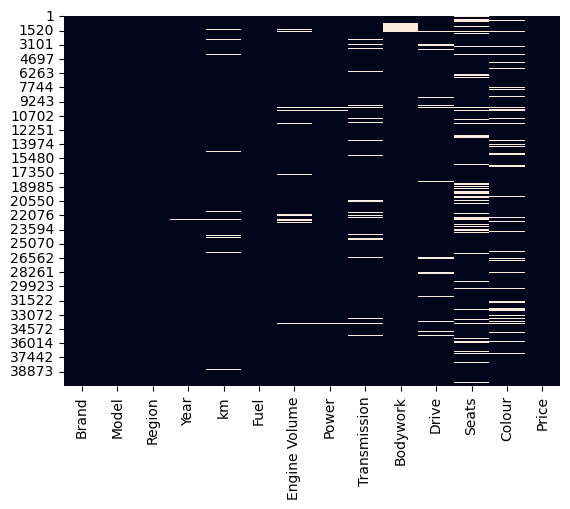

In [138]:
import seaborn as sns
sns.heatmap(cars.isnull(), cbar=False)
plt.show()

### Specific case

In [141]:
# for all electric cars, set the engine volume to 0 and transmission to automatic (only for missing values)
cars["Transmission"] = ["automatic" if (fuel=="Electric" and pd.isnull(transmission)) else transmission for fuel, transmission in zip(cars['Fuel'], cars['Transmission'])]
cars["Engine Volume"] = [0 if (fuel=="Electric" and pd.isnull(volume)) else volume for fuel, volume in zip(cars['Fuel'], cars['Engine Volume'])]

In [143]:
cars.isnull().sum().sort_values(ascending=True)

Brand               0
Model               0
Region              0
Price               0
Fuel               36
Year              117
Power             270
Engine Volume     505
Bodywork          829
Transmission     1199
km               1415
Drive            1772
Colour           3450
Seats            4486
dtype: int64

<a id='univariate'></a>
## 6.1 Univariate imputation

### Fuel, Power, Engine Volume, Bodywork, Transmission, Drive, Colour, Seats

In [147]:
# fill in the most frequently occurring type of fuel FOR EACH COUPLE  BRAND - MODEL
# if this is not found, then insert GENERAL most frequently occurring type of fuel (MODE OF WHOLE COLUMN)
# apply this approach for more columns

In [149]:
for column_name in ['Fuel', 'Power', 'Engine Volume', 'Bodywork', 'Transmission', 'Drive', 'Colour', 'Seats']:
    column_mode = cars[column_name].mode()[0]
    cars[column_name]=cars.groupby(['Brand','Model'])[column_name].transform(lambda x: x.fillna(column_mode if pd.isnull(x.value_counts(dropna=False).index[0]) else x.value_counts(dropna=False).index[0]))

In [150]:
cars.isnull().sum().sort_values(ascending=True)

Brand               0
Model               0
Region              0
Fuel                0
Engine Volume       0
Power               0
Transmission        0
Bodywork            0
Drive               0
Seats               0
Colour              0
Price               0
Year              117
km               1415
dtype: int64

<a id='multivariate'></a>
## 6.2 Multivariate imputation

### Year, km

In [100]:
cars = cars.reset_index(drop=True)

### CatBoostRegressor Grid search

In [173]:
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostRegressor

def cat_boost_regressor_grid_search(df, target_col, numerical_cols, categorical_cols, param_grid):
    
    '''
    Perform grid search for CatBoostRegressor estimator.
            Parameters:
                    df (string): dataframe name
                    target_col (string): name of target column
                    numerical_cols (list): list of numerical column names of dataframe df
                    categorical_cols (list): list of categorical column names of dataframe df
                    param_grid (dict): dictionary with parameters names (str) as keys and lists of parameter settings to try as values           
            Returns:
                    best_params_ (dict): dictionary contains the parameters of the best estimator
    '''
    
    cols = tuple(categorical_cols + numerical_cols)
    X = df[df.columns.intersection(cols)].drop(columns=[target_col])
    y = df[target_col]
    
    X_train = X[y.notnull()]
    y_train = y[y.notnull()]
    X_test = X[y.isnull()]
    
    # Ensure all categorical columns are treated as strings
    for col in categorical_cols:
        X_train[col] = X_train[col].astype(str)
        X_test[col] = X_test[col].astype(str)

    model = CatBoostRegressor(loss_function='RMSE', verbose=0)

    grid = GridSearchCV(estimator=model, param_grid = param_grid, cv = 3, n_jobs=-1)
    grid.fit(X_train, y_train, cat_features=categorical_cols)
    
    return grid.best_params_

In [179]:
numerical_cols = ["Year", "km", "Engine Volume", "Power", "Price"]
categorical_cols = ["Brand", "Model"]
parameters = {'depth' : [6,8,10],
              'learning_rate' : [0.01, 0.05, 0.1],
              'l2_leaf_reg': [0.2, 0.5, 1],
               'iterations': [300, 500]
             }

year_best_params = cat_boost_regressor_grid_search(df=cars, target_col="Year", numerical_cols=numerical_cols, categorical_cols=categorical_cols, param_grid=parameters)
print("CatBoostRegressor Grid search for column Year")
print(f"Best parameters: {year_best_params}")
print("-------------------------------------------------")

km_best_params = cat_boost_regressor_grid_search(df=cars, target_col="km", numerical_cols=numerical_cols, categorical_cols=categorical_cols, param_grid=parameters)
print("CatBoostRegressor Grid search for column km")
print(f"Best parameters: {km_best_params}")

CatBoostRegressor Grid search for column Year
Best parameters: {'depth': 6, 'iterations': 500, 'l2_leaf_reg': 1, 'learning_rate': 0.1}
-------------------------------------------------
CatBoostRegressor Grid search for column km
Best parameters: {'depth': 10, 'iterations': 500, 'l2_leaf_reg': 1, 'learning_rate': 0.1}


### Imputing missing data

In [182]:
def impute_missing_values(df, target_col, numerical_cols, categorical_cols):
    
    '''
    Impute missing values for target column using CatBoostRegressor.
            Parameters:
                    df (string): dataframe name
                    target_col (string): name of target column
                    numerical_cols (list): list of numerical column names of dataframe df
                    categorical_cols (list): list of categorical column names of dataframe df           
            Returns:
                    df (dataframe): dataframe with imputed missing values for target column
    '''
    
    cols = tuple(categorical_cols + numerical_cols)
    X = df[df.columns.intersection(cols)].drop(columns=[target_col])
    y = df[target_col]

    X_train = X[y.notnull()]
    y_train = y[y.notnull()]
    X_test = X[y.isnull()]
    
    # Ensure all categorical columns are treated as strings
    for col in categorical_cols:
        X_train[col] = X_train[col].astype(str)
        X_test[col] = X_test[col].astype(str)

    if target_col == 'Year':
        model = CatBoostRegressor(iterations=500, depth=6, l2_leaf_reg= 1, learning_rate=0.1, loss_function='RMSE', verbose=0)
    elif target_col == 'km':
        model = CatBoostRegressor(iterations=500, depth=10, l2_leaf_reg= 1, learning_rate=0.1, loss_function='RMSE', verbose=0)
    
    model.fit(X_train, y_train, cat_features=categorical_cols)

    y_pred = model.predict(X_test)
    
    # Define realistic ranges for predictions
    if target_col == 'Year':
        y_pred = y_pred.round().astype(int).clip(1929,2024)
    elif target_col == 'km':
        y_pred = y_pred.round().astype(int).clip(0, 1000000)
        
    # Impute the missing values
    df.loc[df[target_col].isnull(), target_col] = y_pred

    return df

In [184]:
# Impute missing values for "Year"
cars = impute_missing_values(cars, "Year", numerical_cols, categorical_cols)

# Impute missing values for "km"
cars = impute_missing_values(cars, "km", numerical_cols, categorical_cols)

In [186]:
cars.isnull().sum().sort_values(ascending=True)

Brand            0
Model            0
Region           0
Year             0
km               0
Fuel             0
Engine Volume    0
Power            0
Transmission     0
Bodywork         0
Drive            0
Seats            0
Colour           0
Price            0
dtype: int64

In [189]:
# save to csv
cars.to_csv("cars.csv", index=False)